In [74]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

When you have more than two classes as an option, it's known as `multi-class classification`.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [75]:
# Import dataset
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [76]:
# Show the first training example

print(f"Training sample: {train_data[0]}")
print(f"Training label: {train_labels[0]}")

Training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [77]:
# Check the shape a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

Category of sample: 9



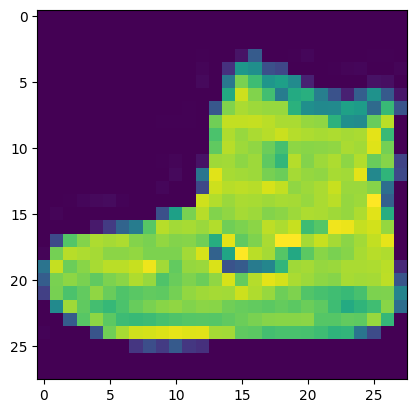

In [78]:
# Plot a single sample
plt.imshow(train_data[0]);
print("Category of sample: {}\n".format(train_labels[0]))

In [79]:
# Create a small list so we can index onto our training labels so they're human-readble
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

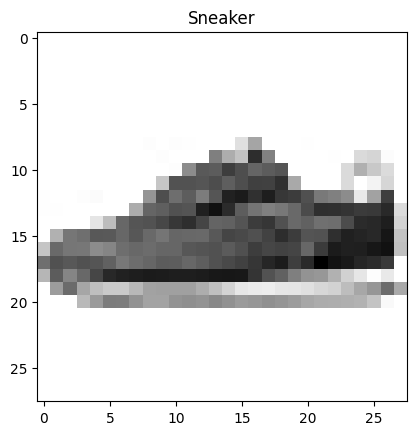

In [80]:
# Plot an example image and its labels
plt.imshow(train_data[52], cmap=plt.cm.binary)
plt.title(class_names[train_labels[52]])

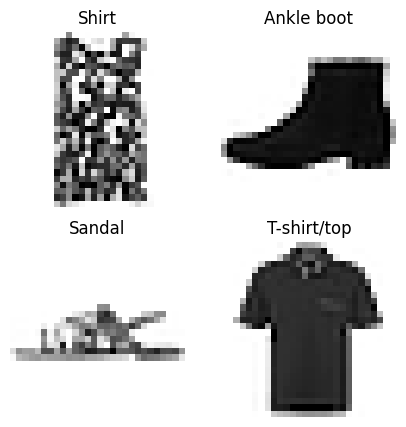

In [81]:
# Plot multiple random images of fashion MNIST

import random

plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have tweak a few things:

1.   Input shape = 28 x 28
2.   Output shape = 10
3. Loss function =tf.keras.losses.CategoricalCrossentropy()
  *   If your labels are one-hot encoded, use CategoricalCrossentropy()
  *   If your labels are integer form, use SparseCategoricalCrossentropy()
4. Output layer activation = softmax (not sigmoid)



Flatten layer: It turns multi-dimensons tensors into 1D.
For instance: we have pics 28x28. It makes it 784 (28x28)

In [82]:
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), # we you use int inputs use Sparse....
    optimizer="Adam",
    metrics=["accuracy"]
)

# 3. Fit the model
history = model.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10) )) # our labels are int. that's why we need use one_hot

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2514 - accuracy: 0.1340 - val_loss: 1.8858 - val_accuracy: 0.2236
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7449 - accuracy: 0.2771 - val_loss: 1.6749 - val_accuracy: 0.3012
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6415 - accuracy: 0.3135 - val_loss: 1.6273 - val_accuracy: 0.3119
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5846 - accuracy: 0.3325 - val_loss: 1.5416 - val_accuracy: 0.3546
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5177 - accuracy: 0.3606 - val_loss: 1.4941 - val_accuracy: 0.3654
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4458 - accuracy: 0.3906 - val_loss: 1.3043 - val_accuracy: 0.4526
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2696 - accuracy: 0.4577 - val_loss: 1.2740 - val_accuracy:

In [83]:
# Check the model_summary

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Check the min and max values of the training data

train_data.max(), train_data.min()

(255, 0)

- Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.
However, our data is between 0 and 255.


In [85]:
# We can get our training and testing data between 0 & 1 by dividing maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [86]:
tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer="Adam",
    metrics=["accuracy"]
)

# 3. Fit the model
norm_history = model_2.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3252 - accuracy: 0.5110 - val_loss: 1.0329 - val_accuracy: 0.6258
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8762 - accuracy: 0.6902 - val_loss: 0.7642 - val_accuracy: 0.7608
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6763 - accuracy: 0.7705 - val_loss: 0.6642 - val_accuracy: 0.7756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6214 - accuracy: 0.7855 - val_loss: 0.6273 - val_accuracy: 0.7883
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5957 - accuracy: 0.7927 - val_loss: 0.6318 - val_accuracy: 0.7849
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5796 - accuracy: 0.7972 - val_loss: 0.6232 - val_accuracy: 0.7869
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5671 - accuracy: 0.8018 - val_loss: 0.6308 - val_accuracy:

**Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)**

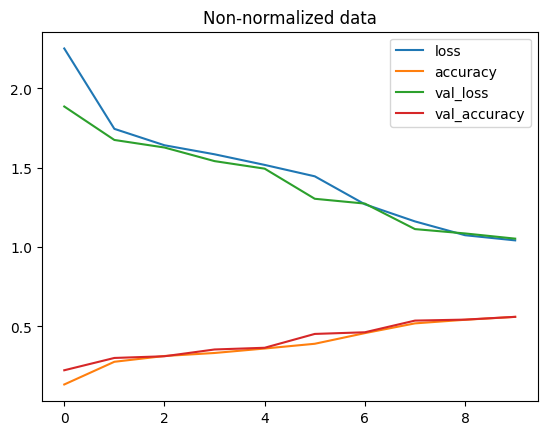

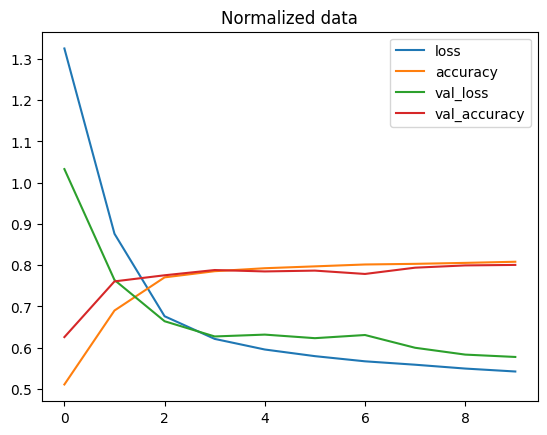

In [87]:
pd.DataFrame(history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")
plt.show()

> **Note:** The same model with even **slightly** different data can produce **dramatically** different results. So when you're comparing models, it is important to make sure you're comparing them on the same criteria. (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [88]:
tf.random.set_seed(42)

# 1
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2.
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. create learning rate callback
lr_sch = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4. Fit the model
model_3_hist = model_3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=lr_sch)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1964 - accuracy: 0.5545 - val_loss: 0.7845 - val_accuracy: 0.6960 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6927 - accuracy: 0.7374 - val_loss: 0.6868 - val_accuracy: 0.7635 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6116 - accuracy: 0.7903 - val_loss: 0.6189 - val_accuracy: 0.7840 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5694 - accuracy: 0.8055 - val_loss: 0.5841 - val_accuracy: 0.7962 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5468 - accuracy: 0.8120 - val_loss: 0.5729 - val_accuracy: 0.8036 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5299 - accuracy: 0.8183 - val_loss: 0.5712 - val_accuracy: 0.8014 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding best lr ')

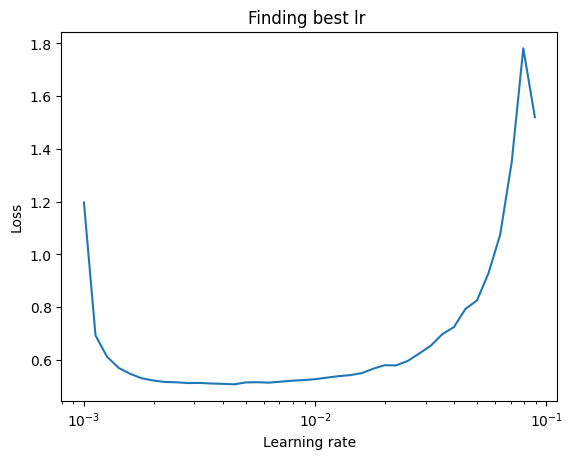

In [89]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, model_3_hist.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding best lr ")

> Find the lowest point in the curve and then go a little back.
we can say 0.002 is the best

In [90]:
tf.random.set_seed(42)

# 1.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics=["accuracy"]
)

# 3
model_4.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=40, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)) )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2339 - accuracy: 0.5355 - val_loss: 0.9146 - val_accuracy: 0.6766
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8208 - accuracy: 0.7304 - val_loss: 0.7822 - val_accuracy: 0.7470
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7321 - accuracy: 0.7571 - val_loss: 0.7339 - val_accuracy: 0.7545
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6918 - accuracy: 0.7645 - val_loss: 0.7153 - val_accuracy: 0.7615
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6691 - accuracy: 0.7684 - val_loss: 0.6960 - val_accuracy: 0.7598
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6514 - accuracy: 0.7726 - val_loss: 0.7084 - val_accuracy: 0.7538
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6377 - accuracy: 0.7772 - val_loss: 0.6614 - val_accuracy:

In [91]:
model_4.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.8070


[0.5766516327857971, 0.8069999814033508]

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:


1. Evalaute its performance using other classification metrics (such as confusion matrix)
2. Assess some of its predictions (through visualizations)
3. Improve its results (by training it longer or changing the architecture)
4. Save and export it for use in an application

Let's go through top 2..



### Confusion matrix

In [92]:
def create_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=15):

  import itertools
  from sklearn.metrics import confusion_matrix

  # create a confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(
      title="Confusion matrix",
      xlabel="Predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the labels size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)

  # Set the threshold for different colors
  th = (cm.max() + cm.min()) /2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({(cm_norm[i, j]*100):.1f})%",
             horizontalalignment="center",
             color="white" if cm[i,j] > th else "black",
             size=text_size
             )


> Remember make predictions on the same kind of data your model was trained on. (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [93]:
y_probs = model_4.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


In [94]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.3804652e-06, 1.2576861e-09, 5.3008847e-10, 5.4955510e-08,
        1.7683546e-10, 1.0155187e-01, 5.9346007e-07, 4.4210798e-01,
        3.1475382e-05, 4.5630667e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [95]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

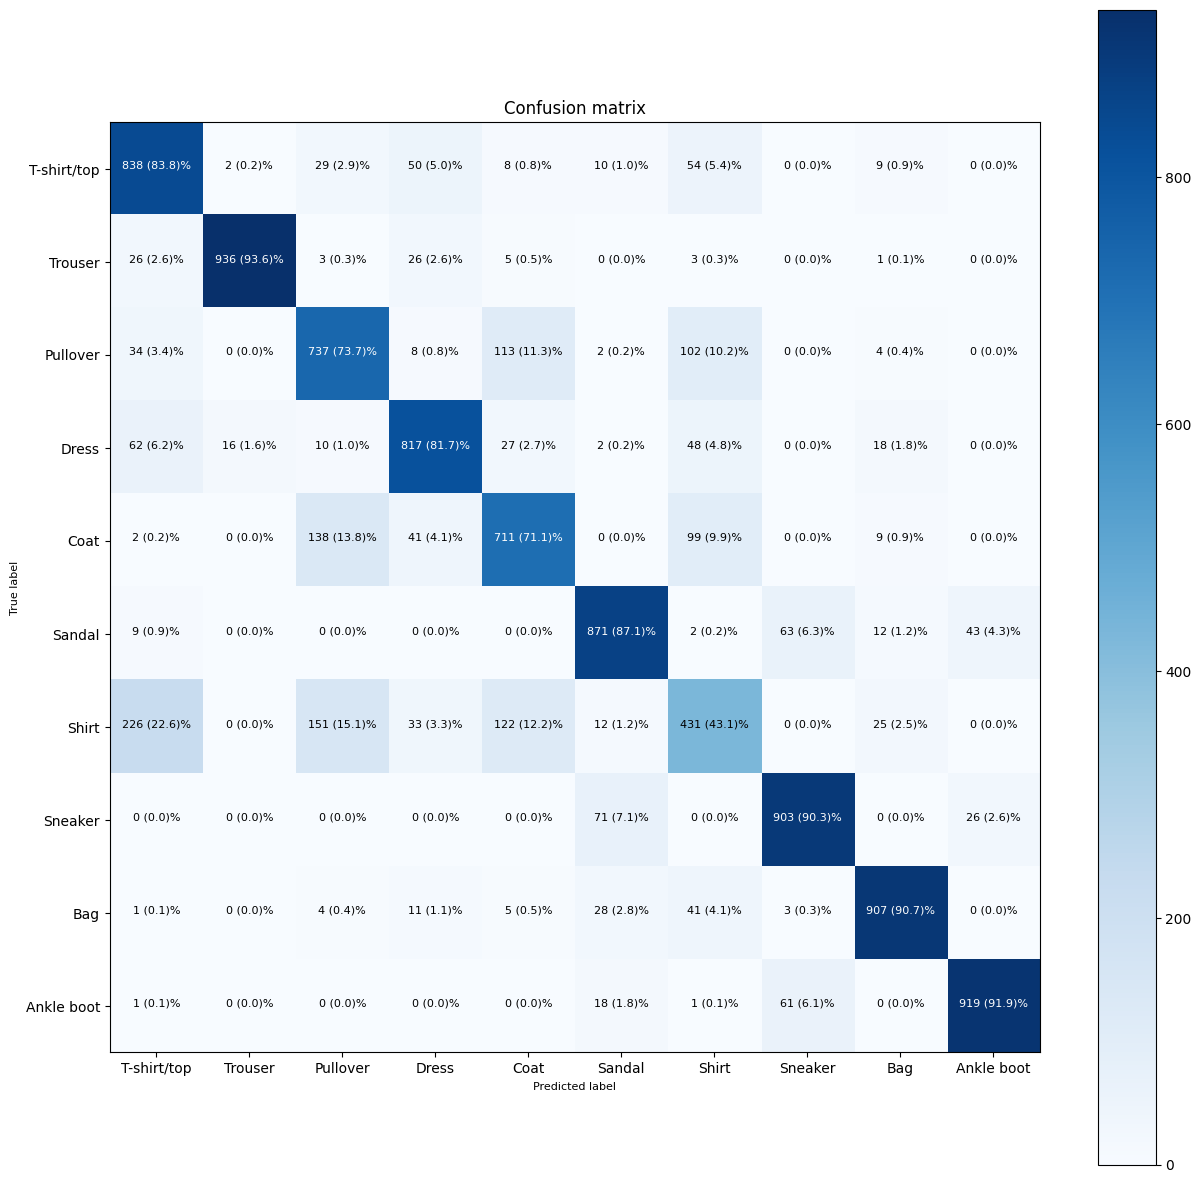

In [96]:

create_confusion_matrix(y_true=test_labels, y_pred=y_preds,classes=class_names,
                        figsize=(15, 15), text_size=8)

> Often when working with images and other forms of visual data, it's a good ide to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your models.

We can create a function to:


1. Plot a random image
2. Make a prediction on said image
3. Label the plot with the truth label & the predicted label



In [97]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random int
  a = random.randint(0, len(images))

  # Create predictions and targets
  target_img = images[a]
  pred_probs = model.predict(target_img.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[a]]

  # Plot the img
  plt.imshow(target_img, cmap=plt.cm.binary)

  # Change the color of the title depending on whether the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)


1/1 [==============================] - 0s 16ms/step


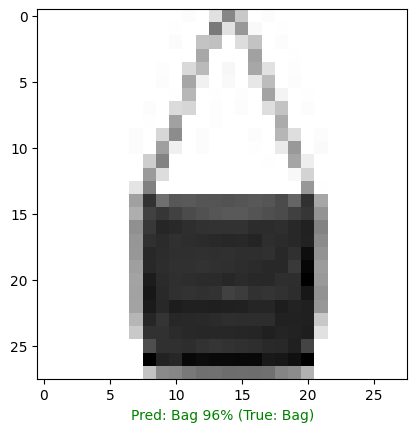

In [98]:
plot_random_image(model=model_4,true_labels= test_labels, images=test_data_norm, classes=class_names)

## What patterns is our model learning ?

In [99]:
# Find the layers of our most recent model
model_4.layers

In [102]:
weights, biasses = model_4.layers[1].get_weights()
weights, weights.shape

(array([[ 1.2561179 ,  0.8318531 , -1.376177  ,  1.2219249 ],
        [-0.17658854,  0.3809258 , -0.18270843, -1.3194759 ],
        [ 0.99987686, -0.17722335, -1.459245  , -0.894388  ],
        ...,
        [ 0.13667116, -0.43148667,  0.0385628 , -0.05533165],
        [-0.4029496 , -0.28632984,  0.4248527 ,  0.4889113 ],
        [ 0.6513937 ,  0.6219607 , -0.85573083,  0.19074965]],
       dtype=float32),
 (784, 4))